In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
file_path='/content/drive/MyDrive/purchases.txt'

In [ ]:
# Read the text file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t', header=None)

# Loading the Data

In [ ]:
df.head()

0      1           2
0   760   25.0  2009-11-06
1   860   50.0  2012-09-28
2  1200  100.0  2005-10-25
3  1420   50.0  2009-07-09
4  1940   70.0  2013-01-25

# Checking the Null Values

In [ ]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

# Renaming the Columns

In [ ]:
df.columns = ['Customer_Id', 'Bill_amount', 'Transaction_date']

In [ ]:
df.nunique()

Customer_Id         18417
Bill_amount           227
Transaction_date     1879
dtype: int64

In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date
0          760         25.0       2009-11-06
1          860         50.0       2012-09-28
2         1200        100.0       2005-10-25
3         1420         50.0       2009-07-09
4         1940         70.0       2013-01-25

Choose a Reference Date: In this case, we will use the end of the dataset period, which is 2015-12-31.
Add a New Column for Recency: Store the calculated days since as a new column.

In [ ]:
# Convert Transaction_date to datetime format
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

# Choose reference date
reference_date = pd.to_datetime('2015-12-31')

# Calculate recency for each customer based on the most recent transaction
df_recency = df.groupby('Customer_Id').agg({'Transaction_date': 'max'}).reset_index()
df_recency['Recency'] = (reference_date - df_recency['Transaction_date']).dt.days

# Merge recency data back into the original dataframe
df = df.merge(df_recency[['Customer_Id', 'Recency']], on='Customer_Id', how='left')

# Drop the duplicate 'Recency' column from the original data if it exists
if 'Recency_x' in df.columns:
    df.drop(columns=['Recency_x'], inplace=True)
    df.rename(columns={'Recency_y': 'Recency'}, inplace=True)

# Display the result
print(df)

       Customer_Id  Bill_amount Transaction_date  Recency
0              760         25.0       2009-11-06     1272
1              860         50.0       2012-09-28      236
2             1200        100.0       2005-10-25     1191
3             1420         50.0       2009-07-09       23
4             1940         70.0       2013-01-25      685
...            ...          ...              ...      ...
51238       163230         30.0       2011-11-12        5
51239       154410        100.0       2013-11-15        0
51240       189270         30.0       2014-12-23      373
51241       173810         30.0       2015-05-28      217
51242         9830         50.0       2011-11-30       56

[51243 rows x 4 columns]


In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date  Recency
0          760         25.0       2009-11-06     1272
1          860         50.0       2012-09-28      236
2         1200        100.0       2005-10-25     1191
3         1420         50.0       2009-07-09       23
4         1940         70.0       2013-01-25      685

In [ ]:
# Convert Transaction_date to datetime format
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

# Choose reference date
reference_date = pd.to_datetime('2015-12-31')

# Calculate days since the transaction date
df['Recency'] = (reference_date - df['Transaction_date']).dt.days




In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date  Recency
0          760         25.0       2009-11-06     2246
1          860         50.0       2012-09-28     1189
2         1200        100.0       2005-10-25     3719
3         1420         50.0       2009-07-09     2366
4         1940         70.0       2013-01-25     1070

To Calculate frequency Group by Customer: Group the data by Customer_Id.
Count Transactions: Count the number of transactions for each customer.

In [ ]:
# Group by Customer_Id and count the number of transactions
frequency_df = df.groupby('Customer_Id').size().reset_index(name='Frequency')

# Merge the frequency data back to the original DataFrame
df = df.merge(frequency_df, on='Customer_Id')


In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date  Recency  Frequency
0          760         25.0       2009-11-06     2246          5
1          760         50.0       2008-10-15     2633          5
2          760         60.0       2007-10-17     2997          5
3          760         30.0       2006-12-26     3292          5
4          760         25.0       2012-07-07     1272          5

To calculate the monetary value Group by Customer: Group the data by Customer_Id.
Sum the Bill Amounts: Calculate the total amount spent by each customer.
Calculate the Average Spending: Divide the total amount spent by the number of transactions for each customer.

In [ ]:
# Group by Customer_Id and calculate total spending
monetary_df = df.groupby('Customer_Id')['Bill_amount'].sum().reset_index(name='Total_Spent')

# Calculate the average spending
monetary_df['Monetary_value'] = monetary_df['Total_Spent'] / df.groupby('Customer_Id').size().values

# Merge the monetary data back to the original DataFrame
df = df.merge(monetary_df[['Customer_Id', 'Monetary_value']], on='Customer_Id')


In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date  Recency  Frequency  \
0          760         25.0       2009-11-06     2246          5   
1          760         50.0       2008-10-15     2633          5   
2          760         60.0       2007-10-17     2997          5   
3          760         30.0       2006-12-26     3292          5   
4          760         25.0       2012-07-07     1272          5   

   Monetary_value  
0            38.0  
1            38.0  
2            38.0  
3            38.0  
4            38.0

In [ ]:
df.tail()

Customer_Id  Bill_amount Transaction_date  Recency  Frequency  \
51238       251870         30.0       2015-10-15       77          1   
51239       254130         60.0       2015-10-30       62          1   
51240        85740         30.0       2007-11-07     2976          1   
51241        78290         10.0       2007-07-20     3086          1   
51242        65460         20.0       2007-03-13     3215          1   

       Monetary_value  
51238            30.0  
51239            60.0  
51240            30.0  
51241            10.0  
51242            20.0

# K Mean Clustering

 Build a 7-segment solution using K-Means clustering based on Recency, Frequency, and Monetary Value (RFM) variables.

Assigning cluster based on this segmentation Segment 0: High Recency, High Frequency, High Monetary Value - Loyal Customers
Segment 1: Moderate Recency, Low Frequency, Moderate Monetary Value - Potential Upsellers
Segment 2: Low Recency, High Frequency, High Monetary Value - Frequent High Spenders
Segment 3: High Recency, Low Frequency, Low Monetary Value - At Risk of Churning
Segment 4: Very Low Recency, Very Low Frequency, Previously High Monetary Value - Lost Customers
Segment 5: High Recency, High Frequency, Low Monetary Value - Frequent Low Spenders
Segment 6: Low Recency, Low Frequency, Moderate Monetary Value - New Entrants

Also printing the Cluster Center

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop unnecessary columns
df = df.drop(columns=['Customer_Id', 'Transaction_date', 'Bill_amount'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary_value']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary_value']))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
       Recency  Frequency  Monetary_value
0  2648.742342   2.830294       40.153850
1   895.326789   9.304321       60.142406
2  1469.623656   3.580645     2463.654624
3  1589.204380  22.846715       45.818892
4  2632.829178   9.722908       62.962764
5   727.942922   2.794532       48.199686
6  1330.274704   5.699605      800.558798


In [ ]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.3709989138517621


In [ ]:
# Define cluster names based on the given segmentation
cluster_names = {
    0: 'Loyal Customers',
    1: 'Potential Upsellers',
    2: 'Frequent High Spenders',
    3: 'At Risk of Churning',
    4: 'Lost Customers',
    5: 'Frequent Low Spenders',
    6: 'New Entrants'
}

# Map the cluster names to the Cluster column
df['C_name'] = df['Cluster'].map(cluster_names)


In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster                 C_name
0     2246          5            38.0        0        Loyal Customers
1     2633          5            38.0        0        Loyal Customers
2     2997          5            38.0        0        Loyal Customers
3     3292          5            38.0        0        Loyal Customers
4     1272          5            38.0        5  Frequent Low Spenders

# Visual Representation of the Cluster

In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary_value', color='Cluster',
                    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary_value': 'Monetary Value', 'Cluster': 'Cluster'},
                    title='3D Scatter Plot of Customer Clusters')

fig.show()

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Create a 2D scatter plot
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster',
                 labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'Cluster': 'Cluster'},
                 title='2D Scatter Plot of Customer Clusters (PCA)')

fig.show()

In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster                 C_name  \
0     2246          5            38.0        0        Loyal Customers   
1     2633          5            38.0        0        Loyal Customers   
2     2997          5            38.0        0        Loyal Customers   
3     3292          5            38.0        0        Loyal Customers   
4     1272          5            38.0        5  Frequent Low Spenders   

       PCA1      PCA2  
0 -0.512837 -0.104758  
1 -0.781449 -0.027845  
2 -1.034098  0.044496  
3 -1.238854  0.103124  
4  0.163206 -0.298330

In [ ]:
df = df.drop(columns=['PCA1', 'PCA2'])

In [ ]:
# Calculate percentiles for each column
recency_percentiles = df['Recency'].quantile([0.2, 0.4, 0.6, 0.8])
frequency_percentiles = df['Frequency'].quantile([0.2, 0.4, 0.6, 0.8])
monetary_percentiles = df['Monetary_value'].quantile([0.2, 0.4, 0.6, 0.8])

print("Recency Percentiles:")
print(recency_percentiles)
print("\nFrequency Percentiles:")
print(frequency_percentiles)
print("\nMonetary Value Percentiles:")
print(monetary_percentiles)


Recency Percentiles:
0.2     575.0
0.4    1162.0
0.6    1912.0
0.8    2702.0
Name: Recency, dtype: float64

Frequency Percentiles:
0.2    2.0
0.4    3.0
0.6    6.0
0.8    9.0
Name: Frequency, dtype: float64

Monetary Value Percentiles:
0.2    22.857143
0.4    30.000000
0.6    43.461538
0.8    65.625000
Name: Monetary_value, dtype: float64


Calculate Quantiles: Calculate the 20th, 40th, 60th, 80th percentiles for each metric (Recency, Frequency, Monetary Value).
Assign Segment Labels: Based on which quantile a customer's metric falls into, assign the corresponding segment label.

Recency:

0-20th percentile: Very Recent
20th-40th percentile: Recent
40th-60th percentile: Moderately Recent
60th-80th percentile: Less Recent
80th-100th percentile: Inactive

Frequency:

0-20th percentile: Very Rare Buyers
20th-40th percentile: Rare Buyers
40th-60th percentile: Occasional Buyers
60th-80th percentile: Regular Buyers
80th-100th percentile: Frequent Buyers


Monetary Value:

0-20th percentile: Very Low Spenders
20th-40th percentile: Low Spenders
40th-60th percentile: Average Spenders
60th-80th percentile: Moderate Spenders
80th-100th percentile: High Spenders

In [ ]:
def assign_recency_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Recent'
    elif value <= percentiles[0.4]:
        return 'Recent'
    elif value <= percentiles[0.6]:
        return 'Moderately Recent'
    elif value <= percentiles[0.8]:
        return 'Less Recent'
    else:
        return 'Inactive'

def assign_frequency_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Rare Buyers'
    elif value <= percentiles[0.4]:
        return 'Rare Buyers'
    elif value <= percentiles[0.6]:
        return 'Occasional Buyers'
    elif value <= percentiles[0.8]:
        return 'Regular Buyers'
    else:
        return 'Frequent Buyers'

def assign_monetary_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Low Spenders'
    elif value <= percentiles[0.4]:
        return 'Low Spenders'
    elif value <= percentiles[0.6]:
        return 'Average Spenders'
    elif value <= percentiles[0.8]:
        return 'Moderate Spenders'
    else:
        return 'High Spenders'

# Apply the segmentation
df['Recency_Segment'] = df['Recency'].apply(lambda x: assign_recency_segment(x, recency_percentiles))
df['Frequency_Segment'] = df['Frequency'].apply(lambda x: assign_frequency_segment(x, frequency_percentiles))
df['Monetary_Segment'] = df['Monetary_value'].apply(lambda x: assign_monetary_segment(x, monetary_percentiles))




In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster                 C_name  \
0     2246          5            38.0        0        Loyal Customers   
1     2633          5            38.0        0        Loyal Customers   
2     2997          5            38.0        0        Loyal Customers   
3     3292          5            38.0        0        Loyal Customers   
4     1272          5            38.0        5  Frequent Low Spenders   

     Recency_Segment  Frequency_Segment  Monetary_Segment  
0        Less Recent  Occasional Buyers  Average Spenders  
1        Less Recent  Occasional Buyers  Average Spenders  
2           Inactive  Occasional Buyers  Average Spenders  
3           Inactive  Occasional Buyers  Average Spenders  
4  Moderately Recent  Occasional Buyers  Average Spenders

In [ ]:
# Assign segments
df['Recency_Segment'] = df['Recency'].apply(lambda x: assign_recency_segment(x, recency_percentiles))
df['Frequency_Segment'] = df['Frequency'].apply(lambda x: assign_frequency_segment(x, frequency_percentiles))
df['Monetary_Segment'] = df['Monetary_value'].apply(lambda x: assign_monetary_segment(x, monetary_percentiles))

# Aggregate data for plotting
recency_agg = df.groupby('Recency_Segment')['Recency'].mean().reset_index()
frequency_agg = df.groupby('Frequency_Segment')['Frequency'].mean().reset_index()
monetary_agg = df.groupby('Monetary_Segment')['Monetary_value'].mean().reset_index()


# Visualization of Recency ,Frequency and Monetary value Segment

In [ ]:
import plotly.express as px

# Plot Recency
fig_recency = px.bar(
    recency_agg,
    x='Recency_Segment',
    y='Recency',
    title='Average Recency by Segment',
    labels={'Recency_Segment': 'Recency Segment', 'Recency': 'Average Recency'},
    color='Recency_Segment'
)
fig_recency.show()

In [ ]:
# Plot Frequency
fig_frequency = px.bar(
    frequency_agg,
    x='Frequency_Segment',
    y='Frequency',
    title='Average Frequency by Segment',
    labels={'Frequency_Segment': 'Frequency Segment', 'Frequency': 'Average Frequency'},
    color='Frequency_Segment'
)
fig_frequency.show()

In [ ]:
# Plot Monetary Value
fig_monetary = px.bar(
    monetary_agg,
    x='Monetary_Segment',
    y='Monetary_value',
    title='Average Monetary Value by Segment',
    labels={'Monetary_Segment': 'Monetary Segment', 'Monetary_value': 'Average Monetary Value'},
    color='Monetary_Segment'
)
fig_monetary.show()


# Segment Mappings: Create dictionaries that map segment labels to their scores

In [ ]:
# Define segment mappings
recency_segments = {
    'Very Recent': 5,
    'Recent': 4,
    'Moderately Recent': 3,
    'Less Recent': 2,
    'Inactive': 1
}

frequency_segments = {
    'Very Rare Buyers': 1,
    'Rare Buyers': 2,
    'Occasional Buyers': 3,
    'Regular Buyers': 4,
    'Frequent Buyers': 5
}

monetary_segments = {
    'Very Low Spenders': 1,
    'Low Spenders': 2,
    'Average Spenders': 3,
    'Moderate Spenders': 4,
    'High Spenders': 5
}

# Functions to assign segments
def assign_recency_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Recent'
    elif value <= percentiles[0.4]:
        return 'Recent'
    elif value <= percentiles[0.6]:
        return 'Moderately Recent'
    elif value <= percentiles[0.8]:
        return 'Less Recent'
    else:
        return 'Inactive'

def assign_frequency_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Rare Buyers'
    elif value <= percentiles[0.4]:
        return 'Rare Buyers'
    elif value <= percentiles[0.6]:
        return 'Occasional Buyers'
    elif value <= percentiles[0.8]:
        return 'Regular Buyers'
    else:
        return 'Frequent Buyers'

def assign_monetary_segment(value, percentiles):
    if value <= percentiles[0.2]:
        return 'Very Low Spenders'
    elif value <= percentiles[0.4]:
        return 'Low Spenders'
    elif value <= percentiles[0.6]:
        return 'Average Spenders'
    elif value <= percentiles[0.8]:
        return 'Moderate Spenders'
    else:
        return 'High Spenders'

# Assign segments
df['Recency_Segment'] = df['Recency'].apply(lambda x: assign_recency_segment(x, recency_percentiles))
df['Frequency_Segment'] = df['Frequency'].apply(lambda x: assign_frequency_segment(x, frequency_percentiles))
df['Monetary_Segment'] = df['Monetary_value'].apply(lambda x: assign_monetary_segment(x, monetary_percentiles))

# Map segments to scores
df['Recency_Score'] = df['Recency_Segment'].map(recency_segments)
df['Frequency_Score'] = df['Frequency_Segment'].map(frequency_segments)
df['Monetary_Score'] = df['Monetary_Segment'].map(monetary_segments)



In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster                 C_name  \
0     2246          5            38.0        0        Loyal Customers   
1     2633          5            38.0        0        Loyal Customers   
2     2997          5            38.0        0        Loyal Customers   
3     3292          5            38.0        0        Loyal Customers   
4     1272          5            38.0        5  Frequent Low Spenders   

     Recency_Segment  Frequency_Segment  Monetary_Segment  Recency_Score  \
0        Less Recent  Occasional Buyers  Average Spenders              2   
1        Less Recent  Occasional Buyers  Average Spenders              2   
2           Inactive  Occasional Buyers  Average Spenders              1   
3           Inactive  Occasional Buyers  Average Spenders              1   
4  Moderately Recent  Occasional Buyers  Average Spenders              3   

   Frequency_Score  Monetary_Score  
0                3               3  
1                3               3  
2                3               3  
3                3               3  
4                3               3

In [ ]:
df.tail()

Recency  Frequency  Monetary_value  Cluster                 C_name  \
51238       77          1            30.0        5  Frequent Low Spenders   
51239       62          1            60.0        5  Frequent Low Spenders   
51240     2976          1            30.0        0        Loyal Customers   
51241     3086          1            10.0        0        Loyal Customers   
51242     3215          1            20.0        0        Loyal Customers   

      Recency_Segment Frequency_Segment   Monetary_Segment  Recency_Score  \
51238     Very Recent  Very Rare Buyers       Low Spenders              5   
51239     Very Recent  Very Rare Buyers  Moderate Spenders              5   
51240        Inactive  Very Rare Buyers       Low Spenders              1   
51241        Inactive  Very Rare Buyers  Very Low Spenders              1   
51242        Inactive  Very Rare Buyers  Very Low Spenders              1   

       Frequency_Score  Monetary_Score  
51238                1               2  
51239                1               4  
51240                1               2  
51241                1               1  
51242                1               1

# Calculating the RFM Score



In [ ]:
# Calculate the RFM score
df['RFM_Score'] = df['Recency_Score'] * 100 + df['Frequency_Score'] * 10 + df['Monetary_Score']


In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster        C_name Recency_Segment  \
0     1272          5            38.0        6  New Entrants     Less Recent   
1     1272          5            38.0        6  New Entrants     Less Recent   
2     1272          5            38.0        6  New Entrants     Less Recent   
3     1272          5            38.0        6  New Entrants     Less Recent   
4     1272          5            38.0        6  New Entrants     Less Recent   

   Frequency_Segment  Monetary_Segment  Recency_Score  Frequency_Score  \
0  Occasional Buyers  Average Spenders              2                3   
1  Occasional Buyers  Average Spenders              2                3   
2  Occasional Buyers  Average Spenders              2                3   
3  Occasional Buyers  Average Spenders              2                3   
4  Occasional Buyers  Average Spenders              2                3   

   Monetary_Score  RFM_Score  
0               3        233  
1               3        233  
2               3        233  
3               3        233  
4               3        233

In [ ]:
# Normalize the RFM_Score
scaler = StandardScaler()
df['RFM_Score_Scaled'] = scaler.fit_transform(df[['RFM_Score']])

# Apply k-means clustering to create 7 segments
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster2'] = kmeans.fit_predict(df[['RFM_Score_Scaled']])

# Define cluster names based on their characteristics
cluster_names = {
    0: 'Premium Loyalists',
    1: 'Potential High-Value Customers',
    2: 'Seasonal High-Spenders',
    3: 'At-Risk Moderate Spenders',
    4: 'New Big Spenders',
    5: 'Frequent Bargain Hunters',
    6: 'Dormant High-Value Customers'
}

# Map the cluster names to the Cluster2 column
df['C2_Name'] = df['Cluster2'].map(cluster_names)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Count the number of people in each cluster
cluster_counts = df['C2_Name'].value_counts()

# Display the counts
print(cluster_counts)


C2_Name
New Big Spenders                  10269
At-Risk Moderate Spenders         10261
Potential High-Value Customers    10207
Premium Loyalists                  5692
Dormant High-Value Customers       5682
Seasonal High-Spenders             4592
Frequent Bargain Hunters           4540
Name: count, dtype: int64


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df[['RFM_Score_Scaled']], df['Cluster2'])
print("Silhouette Score for Cluster2: ", silhouette_avg)


Silhouette Score for Cluster2:  0.7771857278251942


In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster           C_name  \
0     2246          5            38.0        0  Loyal Customers   
1     2633          5            38.0        0  Loyal Customers   
2     2997          5            38.0        0  Loyal Customers   
3     3292          5            38.0        0  Loyal Customers   
4     1272          5            38.0        6     New Entrants   

     Recency_Segment  Frequency_Segment  Monetary_Segment  Recency_Score  \
0        Less Recent  Occasional Buyers  Average Spenders              2   
1        Less Recent  Occasional Buyers  Average Spenders              2   
2           Inactive  Occasional Buyers  Average Spenders              1   
3           Inactive  Occasional Buyers  Average Spenders              1   
4  Moderately Recent  Occasional Buyers  Average Spenders              3   

   Frequency_Score  Monetary_Score  RFM_Score  RFM_Score_Scaled  Cluster2  \
0                3               3        233         -0.693712         4   
1                3               3        233         -0.693712         4   
2                3               3        133         -1.396984         0   
3                3               3        133         -1.396984         0   
4                3               3        333          0.009561         2   

                  C2_Name  
0        New Big Spenders  
1        New Big Spenders  
2       Premium Loyalists  
3       Premium Loyalists  
4  Seasonal High-Spenders

We have already segmented R, F, and M into five segments each. Now, we will further categorize these segments into High, Medium, and Low:

Recency:

Very Recent, Recent: High
Moderately Recent: Medium
Less Recent, Inactive: Low
Frequency:

Frequent Buyers, Regular Buyers: High
Occasional Buyers: Medium
Rare Buyers, Very Rare Buyers: Low
Monetary Value:

High Spenders, Moderate Spenders: High
Average Spenders: Medium
Low Spenders, Very Low Spenders: Low

In [ ]:
# Define segment categories
def categorize_rfm(recency, frequency, monetary):
    if recency in [4, 5]:
        r_segment = 'High'
    elif recency == 3:
        r_segment = 'Medium'
    else:
        r_segment = 'Low'

    if frequency in [4, 5]:
        f_segment = 'High'
    elif frequency == 3:
        f_segment = 'Medium'
    else:
        f_segment = 'Low'

    if monetary in [4, 5]:
        m_segment = 'High'
    elif monetary == 3:
        m_segment = 'Medium'
    else:
        m_segment = 'Low'

    return r_segment, f_segment, m_segment

# Apply segmentation
df[['R_Segment', 'F_Segment', 'M_Segment']] = df.apply(
    lambda row: categorize_rfm(row['Recency_Score'], row['Frequency_Score'], row['Monetary_Score']),
    axis=1,
    result_type="expand"
)
# Define a mapping for segment scores
segment_score_mapping = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}

# Apply the mapping to create the combined score
df['R_Segment_Num'] = df['R_Segment'].map(segment_score_mapping)
df['F_Segment_Num'] = df['F_Segment'].map(segment_score_mapping)
df['M_Segment_Num'] = df['M_Segment'].map(segment_score_mapping)
df['Combined_RFM_Score'] = df['R_Segment_Num']*100 + df['F_Segment_Num']*10 + df['M_Segment_Num']


# Define custom segments
def define_custom_segment(row):
    if row['R_Segment'] == 'High' and row['F_Segment'] == 'High' and row['M_Segment'] == 'High':
        return 'Premium Loyalists'
    elif row['R_Segment'] == 'High' and row['F_Segment'] == 'Medium' and row['M_Segment'] == 'High':
        return 'Potential High-Value Customers'
    elif row['R_Segment'] == 'Medium' and row['F_Segment'] == 'Low' and row['M_Segment'] == 'High':
        return 'Seasonal High-Spenders'
    elif row['R_Segment'] == 'Low' and row['F_Segment'] == 'Medium' and row['M_Segment'] == 'Medium':
        return 'At-Risk Moderate Spenders'
    elif row['R_Segment'] == 'High' and row['F_Segment'] == 'Low' and row['M_Segment'] == 'High':
        return 'New Big Spenders'
    elif row['R_Segment'] == 'Medium' and row['F_Segment'] == 'High' and row['M_Segment'] == 'Low':
        return 'Frequent Bargain Hunters'
    elif row['R_Segment'] == 'Low' and row['F_Segment'] == 'Low' and row['M_Segment'] == 'High':
        return 'Dormant High-Value Customers'
    elif row['R_Segment'] == 'High' and row['F_Segment'] == 'High' and row['M_Segment'] == 'Medium':
        return 'Likely to Buy Again'
    elif row['R_Segment'] == 'Medium' and row['F_Segment'] == 'Medium' and row['M_Segment'] == 'Medium':
        return 'At Risk of Churning'
    elif row['R_Segment'] == 'Low' and row['F_Segment'] == 'Low' and row['M_Segment'] == 'Low':
        return 'Lost Customers'
    else:
        return 'Other'

df['Custom_Segment'] = df.apply(define_custom_segment, axis=1)

# Display the DataFrame
print(df[['Recency', 'Frequency', 'Monetary_value', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'R_Segment', 'F_Segment', 'M_Segment', 'Custom_Segment']])


       Recency  Frequency  Monetary_value  Recency_Score  Frequency_Score  \
0         2246          5            38.0              2                3   
1         2633          5            38.0              2                3   
2         2997          5            38.0              1                3   
3         3292          5            38.0              1                3   
4         1272          5            38.0              3                3   
...        ...        ...             ...            ...              ...   
51238       77          1            30.0              5                1   
51239       62          1            60.0              5                1   
51240     2976          1            30.0              1                1   
51241     3086          1            10.0              1                1   
51242     3215          1            20.0              1                1   

       Monetary_Score R_Segment F_Segment M_Segment             Custom_Segm

In [ ]:
import pandas as pd

# Compute percentiles for Combined_RFM_Score
percentiles = df['Combined_RFM_Score'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# Define ranges for each segment based on computed percentiles
def define_segment_range(segment):
    ranges = {
        'Premium Loyalists': (percentiles[0.75], df['Combined_RFM_Score'].max()),
        'Potential High-Value Customers': (percentiles[0.5], percentiles[0.75]),
        'Seasonal High-Spenders': (percentiles[0.25], percentiles[0.5]),
        'At-Risk Moderate Spenders': (percentiles[0.1], percentiles[0.25]),
        'New Big Spenders': (percentiles[0.5], percentiles[0.75]),
        'Frequent Bargain Hunters': (percentiles[0.75], percentiles[0.9]),
        'Dormant High-Value Customers': (percentiles[0.9], df['Combined_RFM_Score'].max()),
        'Likely to Buy Again': (percentiles[0.5] - 10, percentiles[0.5]),
        'At Risk of Churning': (percentiles[0.5] - 20, percentiles[0.5] - 10),
        'Lost Customers': (df['Combined_RFM_Score'].min(), percentiles[0.5] - 20),
        'Other': (df['Combined_RFM_Score'].min(), df['Combined_RFM_Score'].max())
    }
    return ranges.get(segment, (df['Combined_RFM_Score'].min(), df['Combined_RFM_Score'].max()))

# Create a DataFrame to hold the segment ranges
segment_ranges_df = pd.DataFrame({
    'Custom_Segment': ['Premium Loyalists', 'Potential High-Value Customers', 'Seasonal High-Spenders', 'At-Risk Moderate Spenders',
                       'New Big Spenders', 'Frequent Bargain Hunters', 'Dormant High-Value Customers', 'Likely to Buy Again',
                       'At Risk of Churning', 'Lost Customers', 'Other'],
    'Range_Lower': [define_segment_range(segment)[0] for segment in ['Premium Loyalists', 'Potential High-Value Customers', 'Seasonal High-Spenders', 'At-Risk Moderate Spenders',
                       'New Big Spenders', 'Frequent Bargain Hunters', 'Dormant High-Value Customers', 'Likely to Buy Again',
                       'At Risk of Churning', 'Lost Customers', 'Other']],
    'Range_Upper': [define_segment_range(segment)[1] for segment in ['Premium Loyalists', 'Potential High-Value Customers', 'Seasonal High-Spenders', 'At-Risk Moderate Spenders',
                       'New Big Spenders', 'Frequent Bargain Hunters', 'Dormant High-Value Customers', 'Likely to Buy Again',
                       'At Risk of Churning', 'Lost Customers', 'Other']]
})

# Display the segment ranges
print(segment_ranges_df)


                    Custom_Segment  Range_Lower  Range_Upper
0                Premium Loyalists        313.0        333.0
1   Potential High-Value Customers        223.0        313.0
2           Seasonal High-Spenders        123.0        223.0
3        At-Risk Moderate Spenders        111.0        123.0
4                 New Big Spenders        223.0        313.0
5         Frequent Bargain Hunters        313.0        331.0
6     Dormant High-Value Customers        331.0        333.0
7              Likely to Buy Again        213.0        223.0
8              At Risk of Churning        203.0        213.0
9                   Lost Customers        111.0        203.0
10                           Other        111.0        333.0


In [ ]:
# Count the number of customers in each segment
segment_counts = df['Custom_Segment'].value_counts().reset_index()
segment_counts.columns = ['Custom_Segment', 'Customer_Count']

# Display the count of customers in each segment
print(segment_counts)


                    Custom_Segment  Customer_Count
0                            Other           29515
1                   Lost Customers            5306
2                 New Big Spenders            3608
3                Premium Loyalists            3199
4   Potential High-Value Customers            2188
5     Dormant High-Value Customers            2122
6              Likely to Buy Again            1417
7         Frequent Bargain Hunters            1359
8           Seasonal High-Spenders            1143
9        At-Risk Moderate Spenders             890
10             At Risk of Churning             496


# Customer Segment based on R , F , M Segment

In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster        C_name Recency_Segment  \
0     1272          5            38.0        6  New Entrants     Less Recent   
1     1272          5            38.0        6  New Entrants     Less Recent   
2     1272          5            38.0        6  New Entrants     Less Recent   
3     1272          5            38.0        6  New Entrants     Less Recent   
4     1272          5            38.0        6  New Entrants     Less Recent   

   Frequency_Segment  Monetary_Segment  Recency_Score  Frequency_Score  ...  \
0  Occasional Buyers  Average Spenders              2                3  ...   
1  Occasional Buyers  Average Spenders              2                3  ...   
2  Occasional Buyers  Average Spenders              2                3  ...   
3  Occasional Buyers  Average Spenders              2                3  ...   
4  Occasional Buyers  Average Spenders              2                3  ...   

   Cluster2                    C2_Name  R_Segment  F_Segment M_Segment  \
0         3  At-Risk Moderate Spenders        Low     Medium    Medium   
1         3  At-Risk Moderate Spenders        Low     Medium    Medium   
2         3  At-Risk Moderate Spenders        Low     Medium    Medium   
3         3  At-Risk Moderate Spenders        Low     Medium    Medium   
4         3  At-Risk Moderate Spenders        Low     Medium    Medium   

  R_Segment_Num F_Segment_Num M_Segment_Num  Combined_RFM_Score  \
0             1             2             2                 122   
1             1             2             2                 122   
2             1             2             2                 122   
3             1             2             2                 122   
4             1             2             2                 122   

              Custom_Segment  
0  At-Risk Moderate Spenders  
1  At-Risk Moderate Spenders  
2  At-Risk Moderate Spenders  
3  At-Risk Moderate Spenders  
4  At-Risk Moderate Spenders  

[5 rows x 23 columns]

#Assigning Cluster Based on Customer Segment

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
r_encoder = LabelEncoder()
f_encoder = LabelEncoder()
m_encoder = LabelEncoder()

# Fit and transform the segments
df['R_Segment_Num'] = r_encoder.fit_transform(df['R_Segment'])
df['F_Segment_Num'] = f_encoder.fit_transform(df['F_Segment'])
df['M_Segment_Num'] = m_encoder.fit_transform(df['M_Segment'])

# Create feature matrix for K-means
features = df[['R_Segment_Num', 'F_Segment_Num', 'M_Segment_Num']]

# Calculate inertia for different numbers of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoders
r_encoder = LabelEncoder()
f_encoder = LabelEncoder()
m_encoder = LabelEncoder()

# Fit and transform the segments
df['R_Segment_Num'] = r_encoder.fit_transform(df['R_Segment'])
df['F_Segment_Num'] = f_encoder.fit_transform(df['F_Segment'])
df['M_Segment_Num'] = m_encoder.fit_transform(df['M_Segment'])

# Create feature matrix for K-means
features = df[['R_Segment_Num', 'F_Segment_Num', 'M_Segment_Num']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df['Final_Cluster'] = kmeans.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Compute silhouette score
silhouette_avg = silhouette_score(features, df['Final_Cluster'])
print("Silhouette Score for Final_Cluster: ", silhouette_avg)

Silhouette Score for Final_Cluster:  0.48464138084030334


In [ ]:
df.head()

Recency  Frequency  Monetary_value  Cluster        C_name Recency_Segment  \
0     1272          5            38.0        6  New Entrants     Less Recent   
1     1272          5            38.0        6  New Entrants     Less Recent   
2     1272          5            38.0        6  New Entrants     Less Recent   
3     1272          5            38.0        6  New Entrants     Less Recent   
4     1272          5            38.0        6  New Entrants     Less Recent   

   Frequency_Segment  Monetary_Segment  Recency_Score  Frequency_Score  ...  \
0  Occasional Buyers  Average Spenders              2                3  ...   
1  Occasional Buyers  Average Spenders              2                3  ...   
2  Occasional Buyers  Average Spenders              2                3  ...   
3  Occasional Buyers  Average Spenders              2                3  ...   
4  Occasional Buyers  Average Spenders              2                3  ...   

                     C2_Name  R_Segment  F_Segment  M_Segment R_Segment_Num  \
0  At-Risk Moderate Spenders        Low     Medium     Medium             1   
1  At-Risk Moderate Spenders        Low     Medium     Medium             1   
2  At-Risk Moderate Spenders        Low     Medium     Medium             1   
3  At-Risk Moderate Spenders        Low     Medium     Medium             1   
4  At-Risk Moderate Spenders        Low     Medium     Medium             1   

  F_Segment_Num M_Segment_Num Combined_RFM_Score             Custom_Segment  \
0             2             2                122  At-Risk Moderate Spenders   
1             2             2                122  At-Risk Moderate Spenders   
2             2             2                122  At-Risk Moderate Spenders   
3             2             2                122  At-Risk Moderate Spenders   
4             2             2                122  At-Risk Moderate Spenders   

   Final_Cluster  
0              3  
1              3  
2              3  
3              3  
4              3  

[5 rows x 24 columns]

In [ ]:
df.tail()

Recency  Frequency  Monetary_value  Cluster           C_name  \
51238       77          1            30.0        6     New Entrants   
51239       62          1            60.0        6     New Entrants   
51240     2976          1            30.0        0  Loyal Customers   
51241     3086          1            10.0        0  Loyal Customers   
51242     3215          1            20.0        0  Loyal Customers   

      Recency_Segment Frequency_Segment   Monetary_Segment  Recency_Score  \
51238     Very Recent  Very Rare Buyers       Low Spenders              5   
51239     Very Recent  Very Rare Buyers  Moderate Spenders              5   
51240        Inactive  Very Rare Buyers       Low Spenders              1   
51241        Inactive  Very Rare Buyers  Very Low Spenders              1   
51242        Inactive  Very Rare Buyers  Very Low Spenders              1   

       Frequency_Score  ...                         C2_Name  R_Segment  \
51238                1  ...  Potential High-Value Customers       High   
51239                1  ...  Potential High-Value Customers       High   
51240                1  ...    Dormant High-Value Customers        Low   
51241                1  ...    Dormant High-Value Customers        Low   
51242                1  ...    Dormant High-Value Customers        Low   

       F_Segment  M_Segment R_Segment_Num F_Segment_Num M_Segment_Num  \
51238        Low        Low             0             1             1   
51239        Low       High             0             1             0   
51240        Low        Low             1             1             1   
51241        Low        Low             1             1             1   
51242        Low        Low             1             1             1   

      Combined_RFM_Score    Custom_Segment  Final_Cluster  
51238                311             Other              1  
51239                313  New Big Spenders              3  
51240                111    Lost Customers              1  
51241                111    Lost Customers              1  
51242                111    Lost Customers              1  

[5 rows x 24 columns]

# Customer Segment Visualization For Managerial Segmentation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for Recency Segment vs. Customer Segment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='R_Segment_Num', hue='Custom_Segment', palette='viridis')

# Add labels and title
plt.xlabel('Recency Segment (Encoded)')
plt.ylabel('Count')
plt.title('Recency Segment vs. Customer Segment')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


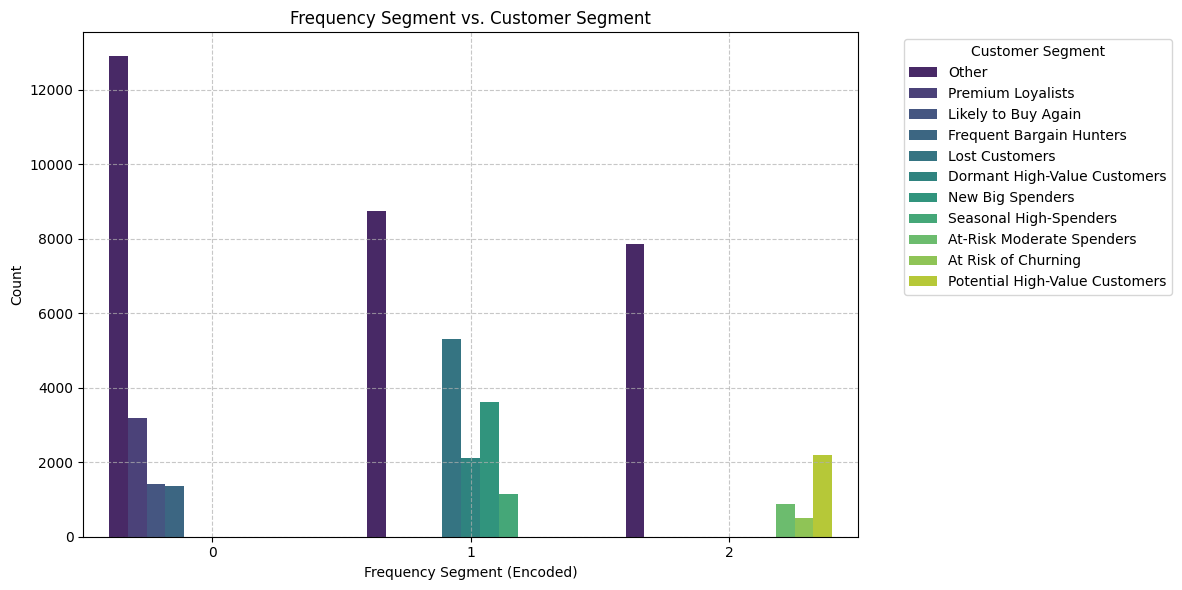

In [ ]:
# Create a bar plot for Frequency Segment vs. Customer Segment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='F_Segment_Num', hue='Custom_Segment', palette='viridis')

# Add labels and title
plt.xlabel('Frequency Segment (Encoded)')
plt.ylabel('Count')
plt.title('Frequency Segment vs. Customer Segment')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Create a bar plot for Monetary Segment vs. Customer Segment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='M_Segment_Num', hue='Custom_Segment', palette='viridis')

# Add labels and title
plt.xlabel('Monetary Segment (Encoded)')
plt.ylabel('Count')
plt.title('Monetary Segment vs. Customer Segment')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

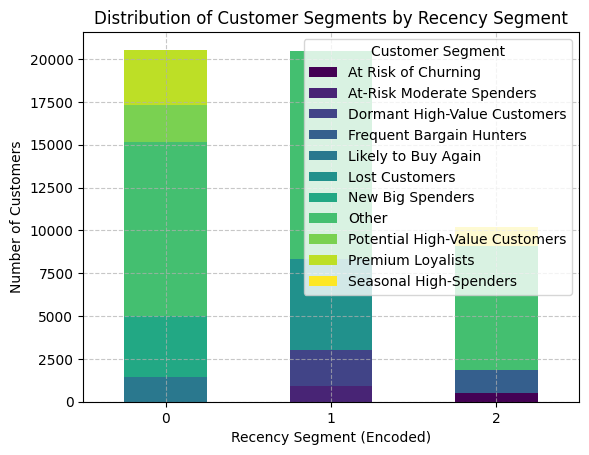

In [ ]:
import matplotlib.pyplot as plt

# Group data by Recency Segment and Customer Segment and count occurrences
recency_segment_counts = df.groupby(['R_Segment_Num', 'Custom_Segment']).size().unstack().fillna(0)

# Plot stacked bar chart for Recency Segment vs. Customer Segment
plt.figure(figsize=(14, 7))
recency_segment_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Recency Segment (Encoded)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments by Recency Segment')
plt.legend(title='Customer Segment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x700 with 0 Axes>

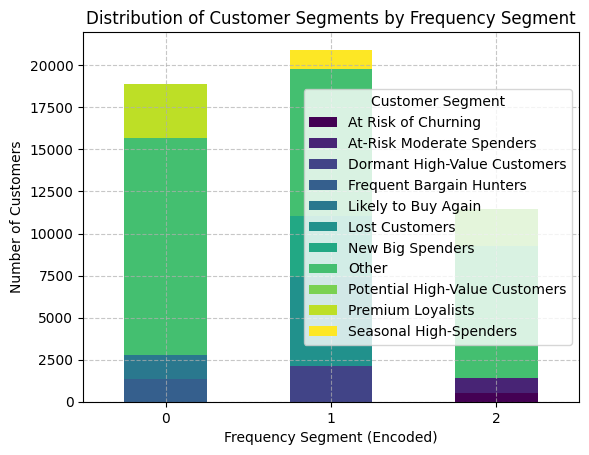

In [ ]:
# Group data by Frequency Segment and Customer Segment and count occurrences
frequency_segment_counts = df.groupby(['F_Segment_Num', 'Custom_Segment']).size().unstack().fillna(0)

# Plot stacked bar chart for Frequency Segment vs. Customer Segment
plt.figure(figsize=(14, 7))
frequency_segment_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Frequency Segment (Encoded)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments by Frequency Segment')
plt.legend(title='Customer Segment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x700 with 0 Axes>

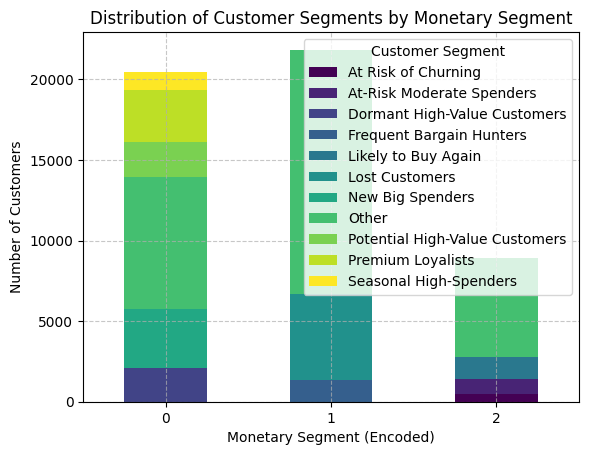

In [ ]:
# Group data by Monetary Segment and Customer Segment and count occurrences
monetary_segment_counts = df.groupby(['M_Segment_Num', 'Custom_Segment']).size().unstack().fillna(0)

# Plot stacked bar chart for Monetary Segment vs. Customer Segment
plt.figure(figsize=(14, 7))
monetary_segment_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Monetary Segment (Encoded)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments by Monetary Segment')
plt.legend(title='Customer Segment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


# Final Cluster Visualization

In [ ]:
import seaborn as sns

# Define the color palette for clusters
palette = sns.color_palette("husl", len(df['Final_Cluster'].unique()))

# Map segment names to colors for better visualization
segment_colors = {
    'Low': 'red',
    'Medium': 'yellow',
    'High': 'green'
}

# Add color column based on segments
df['Recency_Color'] = df['R_Segment'].map(segment_colors)
df['Frequency_Color'] = df['F_Segment'].map(segment_colors)
df['Monetary_Color'] = df['M_Segment'].map(segment_colors)

# Create pair plot
sns.pairplot(df[['R_Segment_Num', 'F_Segment_Num', 'M_Segment_Num', 'Final_Cluster']],
             hue='Final_Cluster', palette=palette, plot_kws={'alpha':0.7})

plt.suptitle('Pair Plot of Segments with Final Clusters', y=1.02)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette for clusters
palette = sns.color_palette("husl", len(df['Final_Cluster'].unique()))

# Create the scatter plot for Recency Segment vs. Final Cluster
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='R_Segment_Num', y='Final_Cluster', hue='Final_Cluster', palette=palette, s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Recency Segment (Encoded)')
plt.ylabel('Final Cluster')
plt.title('Recency Segment vs. Final Cluster')
plt.legend(title='Final Cluster')
plt.grid(True)
plt.show()


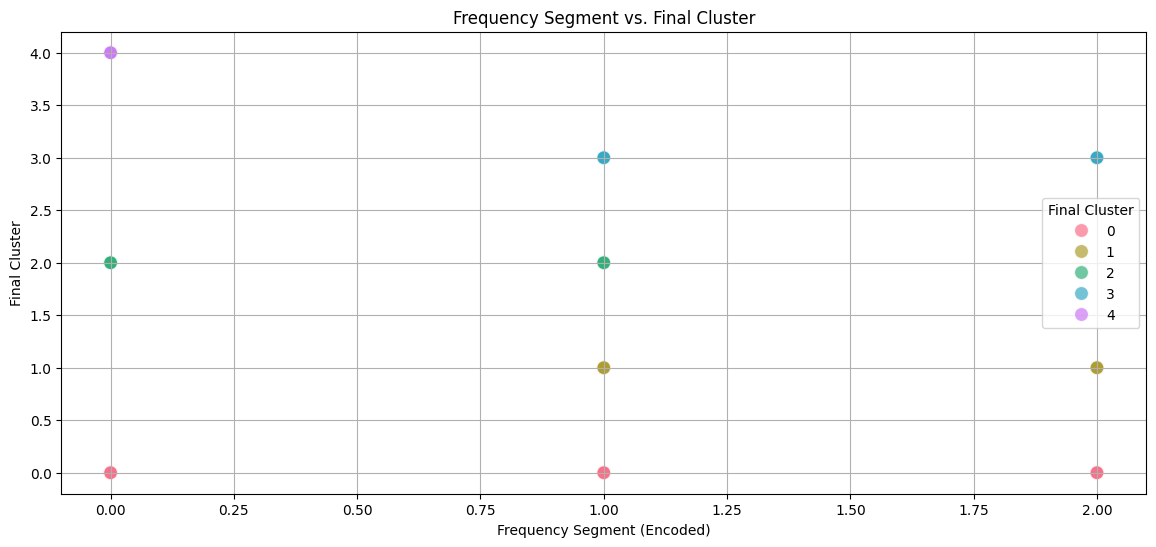

In [ ]:
# Create the scatter plot for Frequency Segment vs. Final Cluster
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='F_Segment_Num', y='Final_Cluster', hue='Final_Cluster', palette=palette, s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Frequency Segment (Encoded)')
plt.ylabel('Final Cluster')
plt.title('Frequency Segment vs. Final Cluster')
plt.legend(title='Final Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Create the scatter plot for Monetary Segment vs. Final Cluster
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='M_Segment_Num', y='Final_Cluster', hue='Final_Cluster', palette=palette, s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Monetary Segment (Encoded)')
plt.ylabel('Final Cluster')
plt.title('Monetary Segment vs. Final Cluster')
plt.legend(title='Final Cluster')
plt.grid(True)
plt.show()


# **CLV Computation**

In [ ]:
file_path='/content/drive/MyDrive/purchases.txt'

In [ ]:
# Read the text file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t', header=None)

In [ ]:
df.columns = ['Customer_Id', 'Bill_amount', 'Transaction_date']

In [ ]:
df.head()

Customer_Id  Bill_amount Transaction_date
0          760         25.0       2009-11-06
1          860         50.0       2012-09-28
2         1200        100.0       2005-10-25
3         1420         50.0       2009-07-09
4         1940         70.0       2013-01-25

In [ ]:
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

In [ ]:
# Filter data for transactions up to 2014
df_2014 = df[df['Transaction_date'] < '2015-01-01']

# Calculate Recency, Frequency, and Monetary value for each customer
rfm_2014 = df_2014.groupby('Customer_Id').agg({
    'Transaction_date': lambda x: (pd.to_datetime('2015-01-01') - x.max()).days,
    'Customer_Id': 'count',
    'Bill_amount': 'sum'
}).rename(columns={
    'Transaction_date': 'Recency',
    'Customer_Id': 'Frequency',
    'Bill_amount': 'Monetary_value'
}).reset_index()

print(rfm_2014)


       Customer_Id  Recency  Frequency  Monetary_value
0               10     3464          1            30.0
1               80      302          6           420.0
2               90      393         10          1158.0
3              120     1036          1            20.0
4              130     2605          2           100.0
...            ...      ...        ...             ...
16900       235200       21          1           100.0
16901       235210       89          1           500.0
16902       236310        6          1            30.0
16903       236660      390          2           150.0
16904       245840       48          1            50.0

[16905 rows x 4 columns]


In [ ]:
# Categorize Recency, Frequency, and Monetary_value
def categorize_rfm(recency, frequency, monetary):
    if recency <= 365:
        r_segment = 'High'
    elif recency <= 730:
        r_segment = 'Medium'
    else:
        r_segment = 'Low'

    if frequency >= 10:
        f_segment = 'High'
    elif frequency >= 5:
        f_segment = 'Medium'
    else:
        f_segment = 'Low'

    if monetary >= 1000:
        m_segment = 'High'
    elif monetary >= 500:
        m_segment = 'Medium'
    else:
        m_segment = 'Low'

    return r_segment, f_segment, m_segment

rfm_2014[['R_Segment', 'F_Segment', 'M_Segment']] = rfm_2014.apply(
    lambda row: categorize_rfm(row['Recency'], row['Frequency'], row['Monetary_value']),
    axis=1,
    result_type="expand"
)

print(rfm_2014)


       Customer_Id  Recency  Frequency  Monetary_value R_Segment F_Segment  \
0               10     3464          1            30.0       Low       Low   
1               80      302          6           420.0      High    Medium   
2               90      393         10          1158.0    Medium      High   
3              120     1036          1            20.0       Low       Low   
4              130     2605          2           100.0       Low       Low   
...            ...      ...        ...             ...       ...       ...   
16900       235200       21          1           100.0      High       Low   
16901       235210       89          1           500.0      High       Low   
16902       236310        6          1            30.0      High       Low   
16903       236660      390          2           150.0    Medium       Low   
16904       245840       48          1            50.0      High       Low   

      M_Segment  
0           Low  
1           Low  
2        

In [ ]:
# Filter data for transactions in 2015
df_2015 = df[(df['Transaction_date'] >= '2015-01-01') & (df['Transaction_date'] < '2016-01-01')]

# Calculate Recency, Frequency, and Monetary value for each customer in 2015
rfm_2015 = df_2015.groupby('Customer_Id').agg({
    'Transaction_date': lambda x: (pd.to_datetime('2016-01-01') - x.max()).days,
    'Customer_Id': 'count',
    'Bill_amount': 'sum'
}).rename(columns={
    'Transaction_date': 'Recency',
    'Customer_Id': 'Frequency',
    'Bill_amount': 'Monetary_value'
}).reset_index()

rfm_2015[['R_Segment', 'F_Segment', 'M_Segment']] = rfm_2015.apply(
    lambda row: categorize_rfm(row['Recency'], row['Frequency'], row['Monetary_value']),
    axis=1,
    result_type="expand"
)

print(rfm_2015)


      Customer_Id  Recency  Frequency  Monetary_value R_Segment F_Segment  \
0              80      343          1            80.0      High       Low   
1             480       21          1            45.0      High       Low   
2             830      321          1            50.0      High       Low   
3             850       24          2            60.0      High       Low   
4             860      237          1            60.0      High       Low   
...           ...      ...        ...             ...       ...       ...   
5393       263820        1          1            10.0      High       Low   
5394       263870      135          1            50.0      High       Low   
5395       263880       34          1            20.0      High       Low   
5396       263890        5          1            54.0      High       Low   
5397       264200        1          1           500.0      High       Low   

     M_Segment  
0          Low  
1          Low  
2          Low  
3      

In [ ]:
# Merge 2014 and 2015 RFM data
rfm_transition = pd.merge(rfm_2014, rfm_2015, on='Customer_Id', suffixes=('_2014', '_2015'))

# Analyze segment transitions
rfm_transition['R_Segment_Transition'] = rfm_transition['R_Segment_2014'] + ' -> ' + rfm_transition['R_Segment_2015']
rfm_transition['F_Segment_Transition'] = rfm_transition['F_Segment_2014'] + ' -> ' + rfm_transition['F_Segment_2015']
rfm_transition['M_Segment_Transition'] = rfm_transition['M_Segment_2014'] + ' -> ' + rfm_transition['M_Segment_2015']

print(rfm_transition)


      Customer_Id  Recency_2014  Frequency_2014  Monetary_value_2014  \
0              80           302               6                420.0   
1             480            16              11                685.0   
2             830           267               6                290.0   
3             850            62               8                225.0   
4             860           267               9                480.0   
...           ...           ...             ...                  ...   
3881       234590             1               1                 20.0   
3882       234640             1               1                 30.0   
3883       234660             1               1                 35.0   
3884       234760             1               1                 20.0   
3885       236660           390               2                150.0   

     R_Segment_2014 F_Segment_2014 M_Segment_2014  Recency_2015  \
0              High         Medium            Low           343   
1

In [ ]:
rfm_transition.head()

Customer_Id  Recency_2014  Frequency_2014  Monetary_value_2014  \
0           80           302               6                420.0   
1          480            16              11                685.0   
2          830           267               6                290.0   
3          850            62               8                225.0   
4          860           267               9                480.0   

  R_Segment_2014 F_Segment_2014 M_Segment_2014  Recency_2015  Frequency_2015  \
0           High         Medium            Low           343               1   
1           High           High         Medium            21               1   
2           High         Medium            Low           321               1   
3           High         Medium            Low            24               2   
4           High         Medium            Low           237               1   

   Monetary_value_2015 R_Segment_2015 F_Segment_2015 M_Segment_2015  \
0                 80.0           High            Low            Low   
1                 45.0           High            Low            Low   
2                 50.0           High            Low            Low   
3                 60.0           High            Low            Low   
4                 60.0           High            Low            Low   

  R_Segment_Transition F_Segment_Transition M_Segment_Transition  
0         High -> High        Medium -> Low           Low -> Low  
1         High -> High          High -> Low        Medium -> Low  
2         High -> High        Medium -> Low           Low -> Low  
3         High -> High        Medium -> Low           Low -> Low  
4         High -> High        Medium -> Low           Low -> Low

In [ ]:
# Merge 2014 and 2015 data
rfm_merged = pd.merge(rfm_2014, rfm_2015, on='Customer_Id', how='outer')




In [ ]:
# Filter data for transactions up to 2014 and for 2015
df_2014 = df[df['Transaction_date'] < '2015-01-01']
df_2015 = df[(df['Transaction_date'] >= '2015-01-01') & (df['Transaction_date'] < '2016-01-01')]

# Aggregate data
rfm_2014 = df_2014.groupby('Customer_Id').agg({
    'Transaction_date': lambda x: (pd.to_datetime('2015-01-01') - x.max()).days,
    'Customer_Id': 'count',
    'Bill_amount': 'sum'
}).rename(columns={
    'Transaction_date': 'Recency_2014',
    'Customer_Id': 'Frequency_2014',
    'Bill_amount': 'Monetary_2014'
}).reset_index()

rfm_2015 = df_2015.groupby('Customer_Id').agg({
    'Transaction_date': lambda x: (pd.to_datetime('2016-01-01') - x.max()).days,
    'Customer_Id': 'count',
    'Bill_amount': 'sum'
}).rename(columns={
    'Transaction_date': 'Recency_2015',
    'Customer_Id': 'Frequency_2015',
    'Bill_amount': 'Monetary_2015'
}).reset_index()

# Merge 2014 and 2015 data
rfm_merged = pd.merge(rfm_2014, rfm_2015, on='Customer_Id', how='outer')

# Convert 'Customer_Id' to numeric if needed
rfm_merged['Customer_Id'] = pd.to_numeric(rfm_merged['Customer_Id'], errors='coerce')

# Ensure all columns for correlation are numeric
correlation_matrix = rfm_merged[['Recency_2014', 'Frequency_2014', 'Monetary_2014',
                                 'Recency_2015', 'Frequency_2015', 'Monetary_2015']].corr()

# Convert correlation values to percentages
correlation_matrix_percentage = correlation_matrix * 100

print(correlation_matrix_percentage)

                Recency_2014  Frequency_2014  Monetary_2014  Recency_2015  \
Recency_2014      100.000000      -37.544928     -15.891616     22.832530   
Frequency_2014    -37.544928      100.000000      35.237393     -7.075143   
Monetary_2014     -15.891616       35.237393     100.000000     -4.013744   
Recency_2015       22.832530       -7.075143      -4.013744    100.000000   
Frequency_2015     -5.609956       27.775726       4.215151    -11.796389   
Monetary_2015      -3.630949        6.526805      67.288989     -2.827826   

                Frequency_2015  Monetary_2015  
Recency_2014         -5.609956      -3.630949  
Frequency_2014       27.775726       6.526805  
Monetary_2014         4.215151      67.288989  
Recency_2015        -11.796389      -2.827826  
Frequency_2015      100.000000       8.888808  
Monetary_2015         8.888808     100.000000  


In [ ]:
!pip install seaborn matplotlib


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

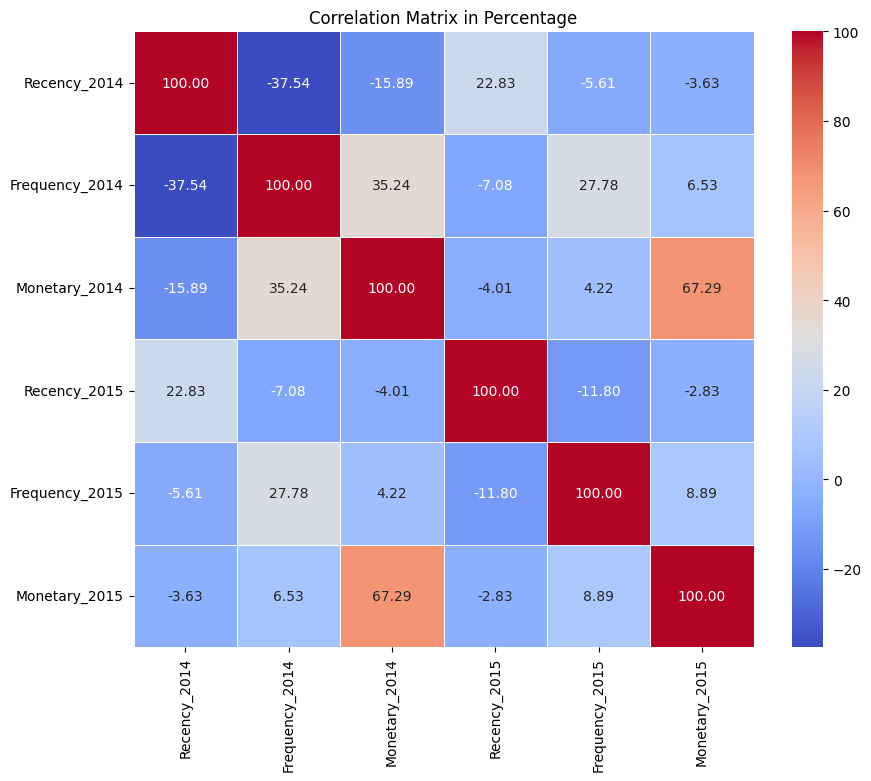

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_percentage, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix in Percentage')
plt.show()